In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Cargar datos
df = pd.read_csv("partidos_cebollitas.csv")

In [2]:
# 2. Filtrar partidos de Cebollitas FC
df_cebollitas = df[
    (df['equipo_local'] == 'Cebollitas FC') | (df['equipo_visitante'] == 'Cebollitas FC')
].copy()

In [3]:
# 3. Crear variables útiles
df_cebollitas['goles_cebollitas'] = df_cebollitas.apply(
    lambda row: row['goles_local'] if row['equipo_local'] == 'Cebollitas FC' else row['goles_visitante'], axis=1
)
df_cebollitas['posesion_cebollitas'] = df_cebollitas.apply(
    lambda row: row['posesion_local (%)'] if row['equipo_local'] == 'Cebollitas FC' else row['posesion_visitante (%)'], axis=1
)
df_cebollitas['tiros_cebollitas'] = df_cebollitas.apply(
    lambda row: row['tiros_arco_local'] if row['equipo_local'] == 'Cebollitas FC' else row['tiros_arco_visitante'], axis=1
)
df_cebollitas['local'] = df_cebollitas['equipo_local'] == 'Cebollitas FC'

In [4]:
# 4. Seleccionar features
features = ['posesion_cebollitas', 'tiros_cebollitas', 'local']
X = df_cebollitas[features].astype(float)
y = df_cebollitas['goles_cebollitas']

In [5]:
# 5. Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 6. Inicializar modelos
model_lr = LinearRegression()
model_tree = DecisionTreeRegressor(max_depth=4, random_state=42)

In [7]:
# 7. Entrenar
model_lr.fit(X_train, y_train)
model_tree.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [8]:
# 8. Predecir
y_pred_lr = model_lr.predict(X_test)
y_pred_tree = model_tree.predict(X_test)

In [9]:
# 9. Evaluar
def evaluar_modelo(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R²': r2_score(y_true, y_pred)
    }

resultados = pd.DataFrame({
    'Regresión Lineal': evaluar_modelo(y_test, y_pred_lr),
    'Árbol de Decisión': evaluar_modelo(y_test, y_pred_tree)
})

print(resultados)

      Regresión Lineal  Árbol de Decisión
MAE           2.304596           2.164983
RMSE          2.597512           2.727179
R²           -1.009237          -1.214846


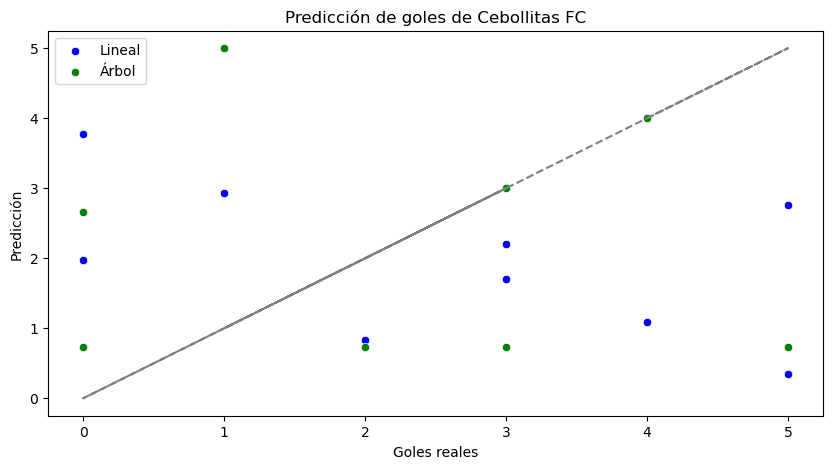

In [10]:
# 10. Visualizar predicciones
plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred_lr, label='Lineal', color='blue')
sns.scatterplot(x=y_test, y=y_pred_tree, label='Árbol', color='green')
plt.plot(y_test, y_test, color='gray', linestyle='--')
plt.xlabel('Goles reales')
plt.ylabel('Predicción')
plt.title('Predicción de goles de Cebollitas FC')
plt.legend()
plt.show()

visualizaciones por estadio y rival, ideal para entender mejor el rendimiento de Cebollitas FC

C:\Users\sampa\AppData\Local\Temp\ipykernel_19496\69197034.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=estadios.values, y=estadios.index, palette='viridis')


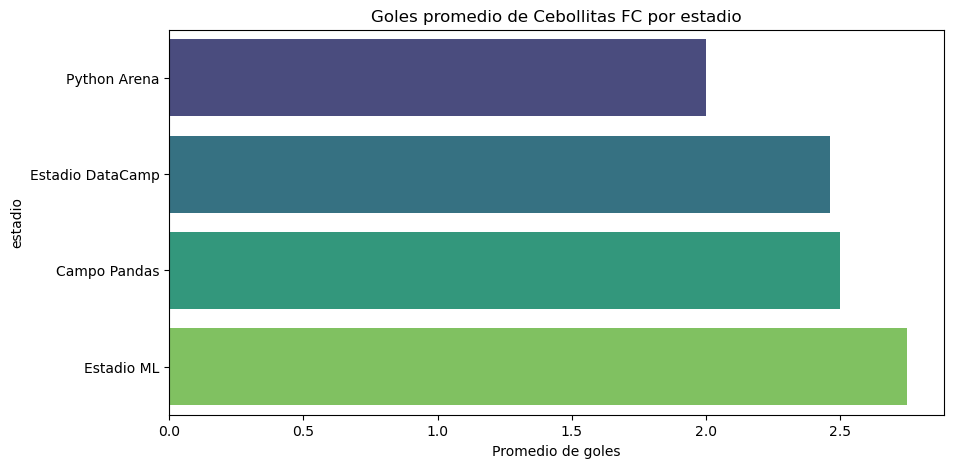

In [11]:
# Goles promedio por estadio
estadios = df_cebollitas.groupby('estadio')['goles_cebollitas'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=estadios.values, y=estadios.index, palette='viridis')
plt.xlabel('Promedio de goles')
plt.title('Goles promedio de Cebollitas FC por estadio')
plt.show()

C:\Users\sampa\AppData\Local\Temp\ipykernel_19496\2505296751.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rivales.values, y=rivales.index, palette='magma')


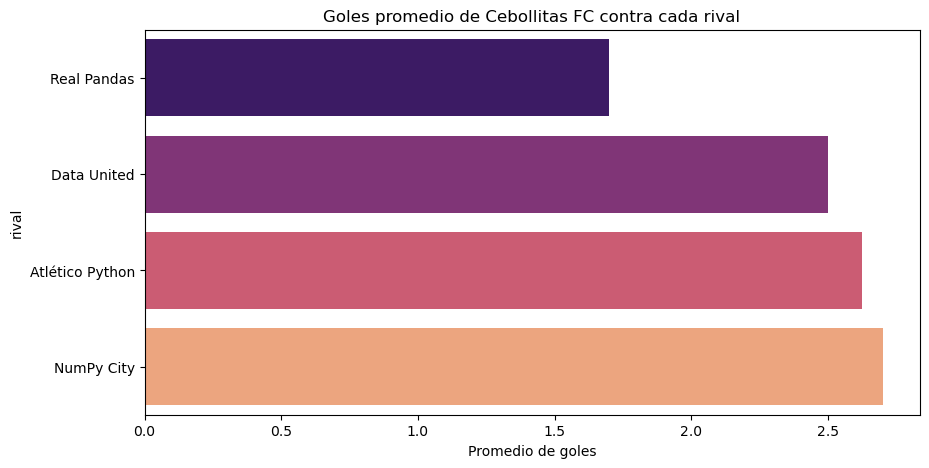

In [12]:
# Identificar rival
df_cebollitas['rival'] = df_cebollitas.apply(
    lambda row: row['equipo_visitante'] if row['equipo_local'] == 'Cebollitas FC' else row['equipo_local'], axis=1
)

# Goles promedio por rival
rivales = df_cebollitas.groupby('rival')['goles_cebollitas'].mean().sort_values()

plt.figure(figsize=(10,5))
sns.barplot(x=rivales.values, y=rivales.index, palette='magma')
plt.xlabel('Promedio de goles')
plt.title('Goles promedio de Cebollitas FC contra cada rival')
plt.show()

# 🧠 ¿Qué puedes descubrir?
* ¿Hay estadios donde Cebollitas FC rinde mejor o peor?

* ¿Hay rivales contra los que consistentemente anotan más o menos?

* ¿Podrías usar esta info como variable categórica en tus modelos?